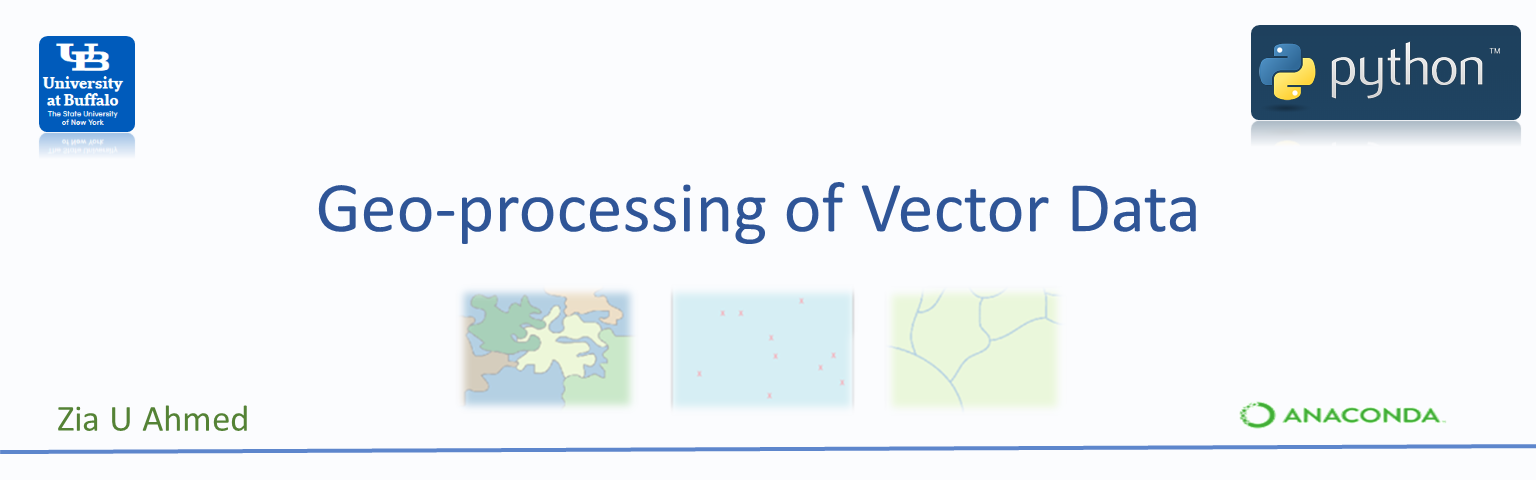


Geo-processing is a GIS operation used to manipulate spatial data. In this exercise we will learn following Geo-processing operations of vector data in Python.

* [Clipping](#Clipping)

* [Extract](#Extract)

* [Dissolve](#Dissolve)

* [Union/Merge](#Union/Merge)

* [Intersect](#Intersect)

* [Buffer](#Buffer)


We will use following data set, and data could available for download from [here](https://www.dropbox.com/s/wkwa6gd9qne569v/Data_04.7z?dl=0).

* US State shape file (US_STATE.shp)
* US County shape file (US_County.shp)
* Point Shape File of soil sampling locations (CO_SOC_data.shp)
* ine shape file (Ononda_Street_PROJ.shp)
* Boundary of Yellow Stone National Park (Yellow_Stone.shp)



#### Import Python libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely.geometry import box
from mpl_toolkits.axes_grid1 import make_axes_locatable
import adjustText as aT

#### Set working directory

In [2]:
path= "E:/GitHub/geospatial-python-github.io/Lesson_04_geoprocessing_vector_data"
os.chdir(path)
#print("Current Working Directory " , os.getcwd())

##  Clipping

Clipping spatial data is a basic GIS task. For vector data, it involves removing unwanted features outside of an area of interest. For example, you might want to do some geospatial modeling covering a area in New York state, but we may have data for USA, in this case you need to apply clipping function to remove area outside of the New York State. It acts like a cookie cutter to cut out a piece of one feature class using one or more of the features in another feature class.

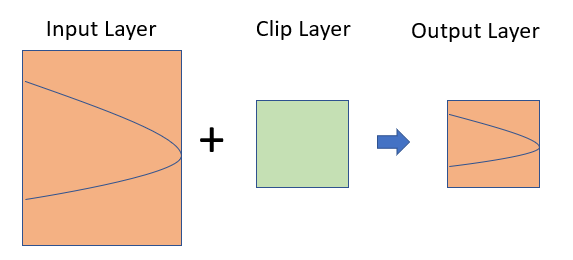


You can do this several ways.In this exercise, we will clip out other state or counties from US State and County polygon shape files, expect our area of interest (for example New York).



In [3]:
# US State shape files
fp_state="Data_04/US_STATE.shp"
state= gpd.read_file(fp_state)
# US County
fp_county="Data_04/US_COUNTY.shp"
county= gpd.read_file(fp_county)

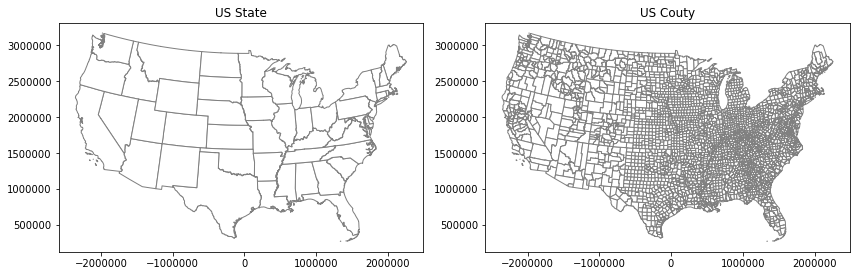

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot US State 
state.plot(alpha=1, color="white", edgecolor="gray", ax=ax1)
# Add title
ax1.set_title("US State");

# Plot US County
county.plot(alpha=1, color="white", edgecolor="gray", ax=ax2);

# Add title
ax2.set_title("US Couty");

# Remove empty white space around the plot
plt.tight_layout()

In [5]:
# Get state names
state['STATE']

0                  Alabama
1                  Arizona
2                 Colorado
3              Connecticut
4                  Florida
5                  Georgia
6                    Idaho
7                  Indiana
8                   Kansas
9                Louisiana
10           Massachusetts
11               Minnesota
12                Missouri
13                 Montana
14                  Nevada
15              New Jersey
16                New York
17            North Dakota
18                Oklahoma
19            Pennsylvania
20          South Carolina
21            South Dakota
22                   Texas
23                 Vermont
24           West Virginia
25                Arkansas
26              California
27                Delaware
28    District of Columbia
29                Illinois
30                    Iowa
31                Kentucky
32                   Maine
33                Maryland
34                Michigan
35             Mississippi
36                Nebraska
3

In [6]:
NY_state = state[state['STATE'] == 'New York']

Text(0.5, 1, 'New York State)')

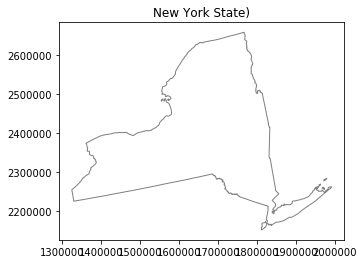

In [7]:
p1=NY_state.plot(color="white", edgecolor="gray")
p1.set_title('New York State)')

In [8]:
county.head()

,FIPS,x,y,REGION_ID,DIVISION_I,STATE_ID,COUNTY_ID,REGION,DIVISION,STATE,COUNTY,geometry
0,1059.0,7.427660e+05,1296358.466,3.0,6.0,1.0,59.0,South,East South Central,Alabama,Franklin County,"POLYGON ((714018.351 1287004.948, 714023.415 1..."
1,13111.0,1.056524e+06,1376613.190,3.0,5.0,13.0,111.0,South,South Atlantic,Georgia,Fannin County,"POLYGON ((1037682.266 1388266.997, 1037756.908..."
2,19109.0,1.449645e+05,2246831.972,2.0,4.0,19.0,109.0,Midwest,West North Central,Iowa,Kossuth County,"POLYGON ((125348.861 2279627.320, 129553.742 2..."
3,40115.0,1.050874e+05,1533019.503,3.0,7.0,40.0,115.0,South,West South Central,Oklahoma,Ottawa County,"POLYGON ((87487.762 1551158.510, 88574.447 155..."
4,42115.0,1.653442e+06,2267301.476,1.0,2.0,42.0,115.0,Northeast,Middle Atlantic,Pennsylvania,Susquehanna County,"POLYGON ((1622673.906 2281043.968, 1623277.874..."


The most useful function to select a area of interest using normal pandas command to create a sub-set of data. 

In [9]:
NY_county = county[county['STATE'] == 'New York']

Text(0.5, 1, 'New York County)')

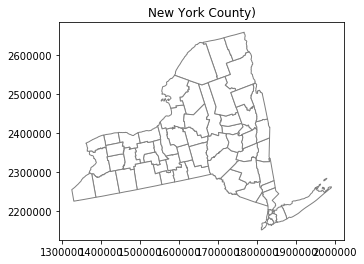

In [10]:
p2=NY_county.plot(color="white", edgecolor="gray")
p2.set_title('New York County)')

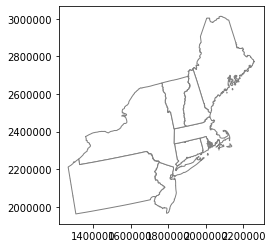

In [11]:
state[state.REGION == 'Northeast']. plot(color="white", edgecolor="gray")

You can select multiple states using follwing command:  

In [12]:
GP_states_NAME = ['Colorado', 'Kansas','New Mexico', 'Wyoming']

In [13]:
GP_STATE= state[state['STATE'].isin(GP_states_NAME)]
GP_STATE.head()

,REGION_ID,DIVISION_I,STATE_ID,REGION,DIVISION,STATE,geometry
2,4.0,8.0,8.0,West,Mountain,Colorado,"POLYGON ((-1145345.510 1637641.179, -1145306.6..."
8,2.0,4.0,20.0,Midwest,West North Central,Kansas,"POLYGON ((-532127.007 1570449.793, -532083.668..."
38,4.0,8.0,35.0,West,Mountain,New Mexico,"POLYGON ((-1231344.076 1018550.430, -1231015.8..."
48,4.0,8.0,56.0,West,Mountain,Wyoming,"POLYGON ((-1245862.655 2125998.454, -1245861.0..."


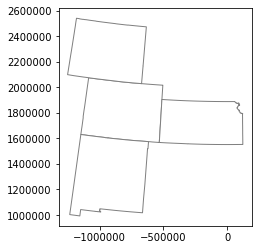

In [14]:
GP_STATE.plot(color="white", edgecolor="gray")

In [15]:
# Write as ESRI shape file
GP_STATE.to_file("Data_04/GP_STATE.shp")

### Clip  Points Shapefile  Using Geopandas

To remove the points that are outside of your study area, you can clip the data. Removing or clipping data can make the data smaller and inturn plotting and analysis faster. 

One way to clip a points layer is to:

1. Create a mask where every point that overlaps the polygon that you wish to clip to is set to true

2. Apply that mask to filter the geopandas dataframe.

To clip the data you first create a unified polygon object that represents the total area covered by your clip layer. If your study area contains only one polygon you can use boundary.geometry[0] to select the first (and only) polygon n the layer. You can also use .unary_union if you have many polygons in your clip boundary. unary.union will combine all of the polygons in your boundary layer into on vector object to use for clipping. Next you can use the **.intersects()** method to select just the points within the pop_places object that fall within the geometry in the poly object.

We will clip GP_POINT_SOC_PROJ shape file  by CO_State shape. file. 


In [16]:
gp_point="Data_04/GP_POINT_SOC_PROJ.shp"
gp_point_proj= gpd.read_file(gp_point)

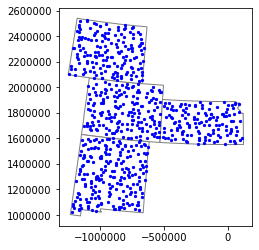

In [17]:
fig, ax = plt.subplots()
GP_STATE.plot(ax=ax, color="white", edgecolor="gray")
gp_point_proj.plot(ax=ax, color='blue', markersize=5)

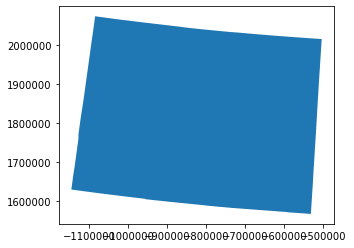

In [18]:
CO_state = state[state['STATE'] == 'Colorado']
CO_state.plot()

In [19]:
CO_poly = CO_state.geometry.unary_union
CO_point = gp_point_proj[gp_point_proj.geometry.intersects(CO_poly)]

Text(0.5, 1, 'Soil Sampling Location at CO State')

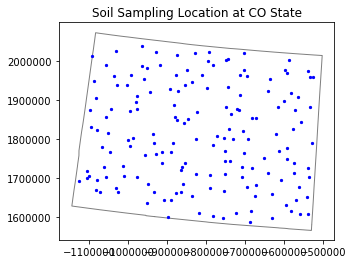

In [20]:
fig, ay = plt.subplots()
CO_state.plot(ax=ay, color="white", edgecolor="gray")
CO_point.plot(ax=ay, color='blue', markersize=5)
ay.set_title('Soil Sampling Location at CO State')

## Extract 

We can save each each state s into separate Shapefiles and named the file according to the state names. Before that you have to group data. The grouping operations can be really handy when dealing with Shapefiles. Doing similar process manually would be really laborious and error-prone. One really useful function that can be used in Pandas/Geopandas is .groupby().  Group by function is useful to group data based on values on selected column(s).

In [21]:
# Group the data by column 'STATE'
grouped = GP_STATE.groupby('STATE')
grouped

In [22]:
# Iterate over the group object
for key, values in grouped:
        GP_STATE = values

In [23]:
# Let's see what is the LAST item 
GP_STATE

,REGION_ID,DIVISION_I,STATE_ID,REGION,DIVISION,STATE,geometry
48,4.0,8.0,56.0,West,Mountain,Wyoming,"POLYGON ((-1245862.655 2125998.454, -1245861.0..."


In [24]:
outFolder =path

In [25]:
# Create a new folder called 'Results' (if does not exist) to that folder using os.makedirs() function
resultFolder = os.path.join(outFolder, 'GP_STATES')
if not os.path.exists(resultFolder):
    os.makedirs(resultFolder)

In [26]:
# Iterate over the
for key, values in grouped:
    # Format the filename (replace spaces with underscores)
    outName = "%s.shp" % key.replace(" ", "_")

    # Print some information for the user
    print("Processing: %s" % key)

    # Create an output path
    outpath = os.path.join(resultFolder, outName)

    # Export the data
    values.to_file(outpath)

Processing: Colorado
Processing: Kansas
Processing: New Mexico
Processing: Wyoming


## Dissolve

**Dissolve** aggregate features based on the attribute. It is an important tools  that we may need to perform regularly in spatial data processing. 

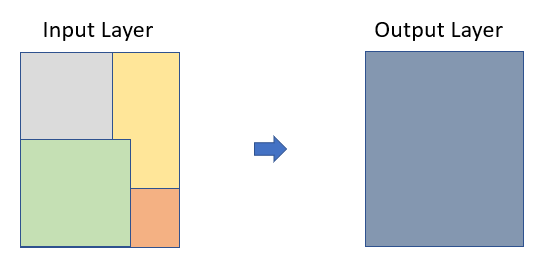

In this excercise will create GP_state boundary after dissloving states boundary of CO, KS, NM and WY. 

In [27]:
gp_state= gpd.read_file("Data_04/GP_STATE.shp")
gp_state.head()

,REGION_ID,DIVISION_I,STATE_ID,REGION,DIVISION,STATE,geometry
0,4.0,8.0,8.0,West,Mountain,Colorado,"POLYGON ((-1145345.510 1637641.179, -1145306.6..."
1,2.0,4.0,20.0,Midwest,West North Central,Kansas,"POLYGON ((-532127.007 1570449.793, -532083.668..."
2,4.0,8.0,35.0,West,Mountain,New Mexico,"POLYGON ((-1231344.076 1018550.430, -1231015.8..."
3,4.0,8.0,56.0,West,Mountain,Wyoming,"POLYGON ((-1245862.655 2125998.454, -1245861.0..."


In [28]:
gp_bd = gp_state.dissolve(by='STATE',aggfunc='sum')

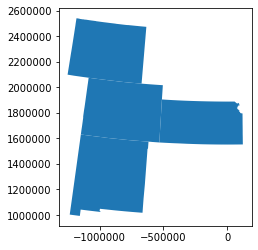

In [29]:
gp_bd.plot()

In [30]:
gp_bd.head()

,geometry,REGION_ID,DIVISION_I,STATE_ID
STATE,,,,
Colorado,"POLYGON ((-1145345.510 1637641.179, -1145306.6...",4.0,8.0,8.0
Kansas,"POLYGON ((-532127.007 1570449.793, -532083.668...",2.0,4.0,20.0
New Mexico,"POLYGON ((-1231344.076 1018550.430, -1231015.8...",4.0,8.0,35.0
Wyoming,"POLYGON ((-1245862.655 2125998.454, -1245861.0...",4.0,8.0,56.0


## Union/Merge

**Union or Merge** combines two or multiple spatial objects and a create new features where geometry and attributes of input features retain. 

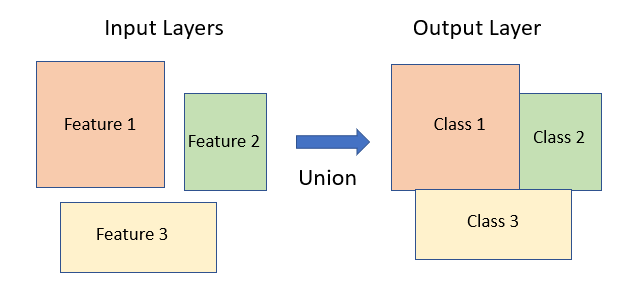

We will use state boundary of  CO, AK, NY and WY to create a new feature class using **.concat** function of geopandas package. 

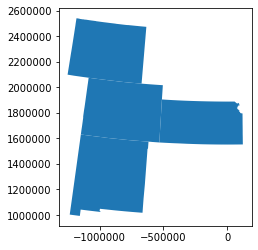

In [31]:
CO = gpd.read_file('Data_04/GP_STATES/Colorado.shp')
KS = gpd.read_file('Data_04/GP_STATES/Kansas.shp')
NM = gpd.read_file('Data_04/GP_STATES/New_Mexico.shp')
WY = gpd.read_file('Data_04/GP_STATES/Wyoming.shp')
# Merge files
gdf_merge = gpd.GeoDataFrame(pd.concat([CO, KS,NM, WY]))
gdf_merge.plot()

You can merge hundreds of spatial polygons in a folder with similar geometry and attribute table using **.concat** function function in a loop. First, you have to create a list these shape files using **folder.glob** function, then use **for loop**  to read all the  files using **.read_file**  function.  

In [32]:
from pathlib import Path

folder = Path("Data_04/GP_STATES")
shapefiles = folder.glob("*.shp")
gdf = pd.concat([
        gpd.read_file(shp)
        for shp in shapefiles
        ]).pipe(gpd.GeoDataFrame)
gdf.to_file(folder / 'GP_STATES_merge.shp')

In [33]:
gp_state_merge= gpd.read_file("Data_04/GP_STATES/GP_STATES_merge.shp")

,REGION_ID,DIVISION_I,STATE_ID,REGION,DIVISION,STATE,geometry
0,4.0,8.0,8.0,West,Mountain,Colorado,"POLYGON ((-1145345.510 1637641.179, -1145306.6..."
1,4.0,8.0,8.0,West,Mountain,Colorado,"POLYGON ((-1145345.510 1637641.179, -1145306.6..."
2,4.0,8.0,8.0,West,Mountain,Colorado,"POLYGON ((-1145345.510 1637641.179, -1145306.6..."
3,4.0,8.0,8.0,West,Mountain,Colorado,"POLYGON ((-1145345.510 1637641.179, -1145306.6..."
4,4.0,8.0,8.0,West,Mountain,Colorado,"POLYGON ((-1145345.510 1637641.179, -1145306.6..."


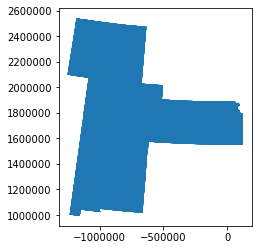

In [34]:
gp_state_merge.plot()
gp_state_merge.head()

## Intersect

**Intersect** computes a geometric of common area of two feature classes. 

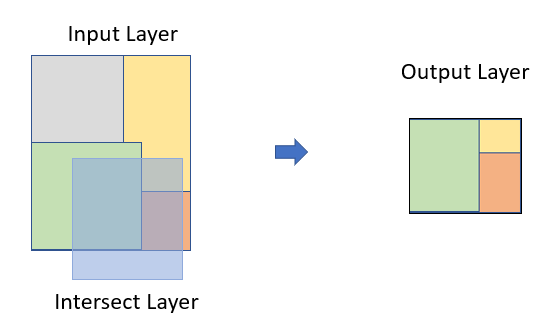


We will use Yellow Stone National Park boundary shape file to find out its location in US states. The shape file of US national park was downloaded from [here](https://catalog.data.gov/data set/national-park-boundariesf0a4c/resource/a601d033-f08e-4430-91f2-674f12109bf6?inner_span=True).

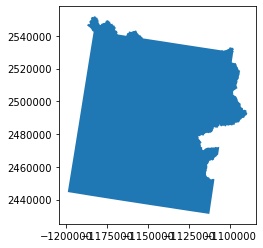

In [35]:
STATE = gpd.read_file('Data_04/US_STATE.shp')
PARK = gpd.read_file('Data_04/Yellow_Stone.shp')

PARK.plot()

In [36]:
#park_state=gpd.sjoin(STATE,PARK, op='intersects')
park_state=gpd.overlay(STATE,PARK, how='intersection')

,REGION_ID,DIVISION_I,STATE_ID,REGION_1,DIVISION,STATE_1,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE_2,REGION_2,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,geometry
0,4.0,8.0,16.0,West,Mountain,Idaho,YELL,Lands - http://landsnet.nps.gov/tractsnet/docu...,Yellowstone National Park,2008-04-23,WY,IM,1609331,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/104...,Yellowstone,"POLYGON ((-1192863.545 2483465.336, -1190334.8..."
1,4.0,8.0,30.0,West,Mountain,Montana,YELL,Lands - http://landsnet.nps.gov/tractsnet/docu...,Yellowstone National Park,2008-04-23,WY,IM,1609331,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/104...,Yellowstone,"POLYGON ((-1098511.001 2527156.525, -1100352.0..."
2,4.0,8.0,56.0,West,Mountain,Wyoming,YELL,Lands - http://landsnet.nps.gov/tractsnet/docu...,Yellowstone National Park,2008-04-23,WY,IM,1609331,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/104...,Yellowstone,"POLYGON ((-1195302.606 2443969.196, -1191465.0..."


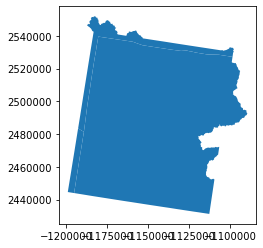

In [37]:
park_state.plot()
park_state.head()

In the shapefiles we have polygons which describe the shape of three states: Idaho, Montana and Wyoming. To place a label on each states we ideally need to find an identifiable point which exists within each polygon so that we can say where we want the text to be placed. Now we will plot th intersect plot with state names. 

In [38]:
park_state["center"] =park_state["geometry"].centroid
park_state_points = park_state.copy()
park_state_points.set_geometry("center", inplace = True)

Text(0.5, 1, 'Yellow Stone National Park')

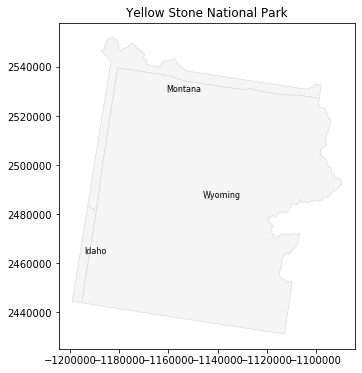

In [39]:
ax = park_state.plot(figsize = (6, 6), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(park_state_points.geometry.x, park_state_points.geometry.y, park_state_points["STATE_1"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

park_map=aT.adjust_text(texts, force_points=0.2, force_text=0.3, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
ax.set_title('Yellow Stone National Park')

## Buffer

Buffering creates an envelope of space around selected features in a vector data. It is  sometimes referred to as a zone of a specified distance around a polygon, line, or point feature. Buffering is often used for proximity analysis. In this section, we will create 400 m buffer zones around the road network and soil  sampling points of CO. Such a buffer could be used later on to examine the extent of farmland or sampling points within the buffer, etc. We will use a small part of road-network of Ononda County to create 100 m buffer around them. 

In [40]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.geometry as geoms
from shapely.geometry import box

In [41]:
road = gpd.read_file('Data_04/Ononda_Street_PROJ.shp')

In [42]:
# buffer_lines =road.geometry.apply(lambda g: g.buffer(250, cap_style=1))

In [43]:
road_buffer= road.buffer(250)

Text(0.5, 1, '250 m Buffer')

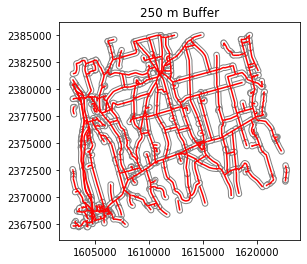

In [44]:
fig, ay = plt.subplots()
road_buffer.plot(ax=ay, color="white", edgecolor="gray")
road.plot(ax=ay, color='red', markersize=5)
ay.set_title('250 m Buffer')

In [45]:
points = gpd.read_file('Data_04/GP_POINT_SOC_PROJ.shp')
points.head()

,SiteID,Longitude,Latitude,StateID,LandCover1,LandCover2,SOC,geometry
0,219,-106.3259,39.2962,CO,Shrubland,Shrubland,4.32,POINT (-880639.256 1855998.327)
1,235,-104.7334,38.6507,CO,Planted/Cultivated,Pasture/Hay,3.28,POINT (-751880.683 1770331.586)
2,475,-105.9953,38.1181,CO,Shrubland,Shrubland,0.38,POINT (-866412.587 1721667.184)
3,491,-103.8946,38.3101,CO,Herbaceous Upland,Grasslands/Herbaceous,0.52,POINT (-683009.075 1725968.024)
4,507,-108.5856,40.3002,CO,Shrubland,Shrubland,1.26,POINT (-1057474.882 1990736.534)


In [46]:
# Remove  columns
columns=['SiteID','Longitude','Latitude','StateID','LandCover1','LandCover2','SOC']
points.drop(columns, axis=1, inplace=True)
points.head()

,geometry
0,POINT (-880639.256 1855998.327)
1,POINT (-751880.683 1770331.586)
2,POINT (-866412.587 1721667.184)
3,POINT (-683009.075 1725968.024)
4,POINT (-1057474.882 1990736.534)


In [47]:
# Create a buffered polygon layer from your plot location points
points_poly =points.copy()

In [48]:
# Buffer each point using a 100 meter circle radius and replace the point geometry with the new buffered geometry
points_poly["geometry"] = points_poly.geometry.buffer(100)
points_poly.head()

,geometry
0,"POLYGON ((-880539.256 1855998.327, -880539.738..."
1,"POLYGON ((-751780.683 1770331.586, -751781.165..."
2,"POLYGON ((-866312.587 1721667.184, -866313.069..."
3,"POLYGON ((-682909.075 1725968.024, -682909.556..."
4,"POLYGON ((-1057374.882 1990736.534, -1057375.3..."
